In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data = pd.read_excel('session5_homework.xlsx')
data = data.set_index('date')
data.head()

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [3]:
corr_mat = data.corr()

corr_mat

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
ISE,1.000000,0.942897,0.439489,0.602081,0.622948,0.260052,0.432898,0.655519,0.600295
ISE.1,0.942897,1.000000,0.449561,0.629218,0.648740,0.393225,0.446889,0.690761,0.701954
SP,0.439489,0.449561,1.000000,0.685843,0.657673,0.131250,0.722069,0.687550,0.528243
DAX,0.602081,0.629218,0.685843,1.000000,0.867369,0.258538,0.585791,0.936393,0.665162
FTSE,0.622948,0.648740,0.657673,0.867369,1.000000,0.255236,0.596287,0.948963,0.687543
NIKKEI,0.260052,0.393225,0.131250,0.258538,0.255236,1.000000,0.172752,0.283750,0.547288
BOVESPA,0.432898,0.446889,0.722069,0.585791,0.596287,0.172752,1.000000,0.621704,0.688074
EU,0.655519,0.690761,0.687550,0.936393,0.948963,0.283750,0.621704,1.000000,0.716502
EM,0.600295,0.701954,0.528243,0.665162,0.687543,0.547288,0.688074,0.716502,1.000000


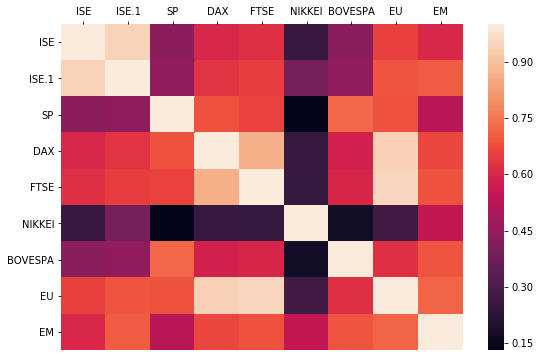

In [4]:
plt.figure(figsize = (9,6))
sns.heatmap(corr_mat, vmax=1., square=False).xaxis.tick_top()

# First, we can set index increase as 1, and the rest is 0.

In [5]:
data[data>0]=1
data[data<=0]=0

In [6]:
frequent_itemsets = apriori(data, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [7]:
result = rules.sort_values(['lift','confidence'], ascending=False)

In [8]:
result.head(10)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18302,"(ISE, BOVESPA, DAX, FTSE, NIKKEI)","(EU, ISE.1, EM, SP)",0.130597,0.257463,0.110075,0.842857,3.273706,0.076451,4.725237
18507,"(EU, ISE.1, EM, SP)","(ISE, BOVESPA, DAX, FTSE, NIKKEI)",0.257463,0.130597,0.110075,0.427536,3.273706,0.076451,1.518704
18342,"(ISE, DAX, SP, EM, NIKKEI)","(BOVESPA, EU, ISE.1, FTSE)",0.138060,0.244403,0.110075,0.797297,3.262224,0.076332,3.727612
18467,"(BOVESPA, EU, ISE.1, FTSE)","(ISE, DAX, SP, EM, NIKKEI)",0.244403,0.138060,0.110075,0.450382,3.262224,0.076332,1.568252
18308,"(ISE, BOVESPA, EU, FTSE, NIKKEI)","(SP, ISE.1, EM, DAX)",0.141791,0.240672,0.110075,0.776316,3.225622,0.075950,3.394644
18501,"(SP, ISE.1, EM, DAX)","(ISE, BOVESPA, EU, FTSE, NIKKEI)",0.240672,0.141791,0.110075,0.457364,3.225622,0.075950,1.581557
18249,"(ISE, DAX, SP, FTSE, EM, NIKKEI)","(BOVESPA, EU, ISE.1)",0.130597,0.263060,0.110075,0.842857,3.204053,0.075720,4.689620
18560,"(BOVESPA, EU, ISE.1)","(ISE, DAX, SP, FTSE, EM, NIKKEI)",0.263060,0.130597,0.110075,0.418440,3.204053,0.075720,1.494949
18392,"(ISE.1, DAX, SP, EM, NIKKEI)","(ISE, EU, BOVESPA, FTSE)",0.141791,0.242537,0.110075,0.776316,3.200810,0.075685,3.386304
18417,"(ISE, EU, BOVESPA, FTSE)","(ISE.1, DAX, SP, EM, NIKKEI)",0.242537,0.141791,0.110075,0.453846,3.200810,0.075685,1.571369


In [9]:
rules[ (rules['lift'] >= 3) &
       (rules['confidence'] >= 0.8) ]

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15915,"(ISE, BOVESPA, DAX, FTSE, NIKKEI)","(EU, ISE.1, SP)",0.130597,0.287313,0.113806,0.871429,3.033024,0.076284,5.543118
15933,"(ISE, DAX, SP, FTSE, NIKKEI)","(BOVESPA, EU, ISE.1)",0.141791,0.263060,0.113806,0.802632,3.051138,0.076506,3.733831
17202,"(ISE, EU, SP, EM, NIKKEI)","(BOVESPA, ISE.1, FTSE)",0.149254,0.263060,0.119403,0.800000,3.041135,0.080140,3.684701
17234,"(ISE, NIKKEI, EU, BOVESPA)","(SP, ISE.1, FTSE, EM)",0.149254,0.259328,0.119403,0.800000,3.084892,0.080697,3.703358
17239,"(ISE, NIKKEI, FTSE, BOVESPA)","(EU, ISE.1, EM, SP)",0.149254,0.257463,0.119403,0.800000,3.107246,0.080976,3.712687
18224,"(ISE, BOVESPA, DAX, FTSE, EM, NIKKEI)","(EU, ISE.1, SP)",0.126866,0.287313,0.110075,0.867647,3.019862,0.073624,5.384743
18247,"(ISE, DAX, EU, SP, EM, NIKKEI)","(BOVESPA, ISE.1, FTSE)",0.134328,0.263060,0.110075,0.819444,3.115051,0.074738,4.081515
18249,"(ISE, DAX, SP, FTSE, EM, NIKKEI)","(BOVESPA, EU, ISE.1)",0.130597,0.263060,0.110075,0.842857,3.204053,0.075720,4.689620
18302,"(ISE, BOVESPA, DAX, FTSE, NIKKEI)","(EU, ISE.1, EM, SP)",0.130597,0.257463,0.110075,0.842857,3.273706,0.076451,4.725237


# Then, we can set index decrease as 1, and the rest is 0.

In [10]:
data2 = abs(data - 1)

In [11]:
frequent_itemsets2 = apriori(data2, min_support=0.07, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

In [12]:
result2 = rules2.sort_values(['lift','confidence'], ascending=False)

In [13]:
result2.head(10)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18308,"(ISE, BOVESPA, EU, FTSE, NIKKEI)","(SP, ISE.1, EM, DAX)",0.117537,0.179104,0.095149,0.809524,4.519841,0.074098,4.309701
18501,"(SP, ISE.1, EM, DAX)","(ISE, BOVESPA, EU, FTSE, NIKKEI)",0.179104,0.117537,0.095149,0.531250,4.519841,0.074098,1.882587
18390,"(ISE.1, DAX, SP, FTSE, EM)","(ISE, NIKKEI, EU, BOVESPA)",0.167910,0.126866,0.095149,0.566667,4.466667,0.073847,2.014925
18419,"(ISE, NIKKEI, EU, BOVESPA)","(ISE.1, DAX, SP, FTSE, EM)",0.126866,0.167910,0.095149,0.750000,4.466667,0.073847,3.328358
18357,"(BOVESPA, ISE.1, DAX, FTSE, NIKKEI)","(ISE, EU, SP, EM)",0.119403,0.180970,0.095149,0.796875,4.403351,0.073541,4.032147
18452,"(ISE, EU, SP, EM)","(BOVESPA, ISE.1, DAX, FTSE, NIKKEI)",0.180970,0.119403,0.095149,0.525773,4.403351,0.073541,1.856911
18465,"(BOVESPA, ISE.1, NIKKEI, DAX)","(ISE, EU, SP, FTSE, EM)",0.128731,0.167910,0.095149,0.739130,4.401932,0.073534,3.189677
18344,"(ISE, EU, SP, FTSE, EM)","(BOVESPA, ISE.1, NIKKEI, DAX)",0.167910,0.128731,0.095149,0.566667,4.401932,0.073534,2.010620
18391,"(ISE.1, DAX, SP, FTSE, NIKKEI)","(ISE, EU, BOVESPA, EM)",0.126866,0.171642,0.095149,0.750000,4.369565,0.073374,3.313433
18418,"(ISE, EU, BOVESPA, EM)","(ISE.1, DAX, SP, FTSE, NIKKEI)",0.171642,0.126866,0.095149,0.554348,4.369565,0.073374,1.959228


In [14]:
rules2[ (rules2['lift'] >= 4) &
       (rules2['confidence'] >= 0.8) ]

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12120,"(ISE, NIKKEI, EU, BOVESPA)","(SP, ISE.1, DAX)",0.126866,0.205224,0.104478,0.823529,4.012834,0.078442,4.503731
12391,"(EU, ISE.1, NIKKEI, SP)","(ISE, EM, DAX)",0.143657,0.216418,0.125000,0.870130,4.020600,0.093910,6.033582
15918,"(ISE, BOVESPA, EU, FTSE, NIKKEI)","(SP, ISE.1, DAX)",0.117537,0.205224,0.100746,0.857143,4.176623,0.076625,5.563433
16173,"(ISE, BOVESPA, FTSE, EM, NIKKEI)","(SP, ISE.1, DAX)",0.115672,0.205224,0.095149,0.822581,4.008211,0.071411,4.479647
16439,"(ISE, EU, SP, FTSE, NIKKEI)","(EM, ISE.1, DAX)",0.128731,0.231343,0.119403,0.927536,4.009350,0.089622,10.607463
16450,"(ISE.1, DAX, SP, FTSE, NIKKEI)","(ISE, EU, EM)",0.126866,0.233209,0.119403,0.941176,4.035765,0.089817,13.035448
16454,"(ISE.1, EU, SP, FTSE, NIKKEI)","(ISE, EM, DAX)",0.134328,0.216418,0.119403,0.888889,4.107280,0.090332,7.052239
16505,"(SP, ISE.1, NIKKEI, DAX)","(ISE, EU, FTSE, EM)",0.136194,0.218284,0.119403,0.876712,4.016392,0.089674,6.340589
16511,"(EU, ISE.1, NIKKEI, SP)","(ISE, EM, FTSE, DAX)",0.143657,0.205224,0.119403,0.831169,4.050059,0.089921,4.707520
16516,"(NIKKEI, SP, ISE.1, FTSE)","(ISE, EU, EM, DAX)",0.139925,0.212687,0.119403,0.853333,4.012164,0.089643,5.368046


A little insteresting result:

We can see the if we set stock indexs go down as 1, the lift values are higher than set stock indexes go up as 1.

Besides, there are more associations and slightly higher confidence level.
    
    